In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

# Задание №1

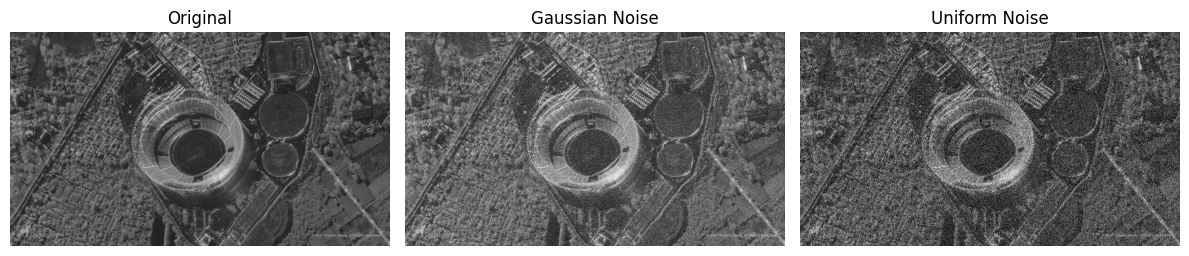

In [8]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap="gray")
plt.title("Original")
plt.axis('off')

mean = 0
stddev = 50
cv2.randn(noise_gauss, mean, stddev)
noisy_image = cv2.add(image_gray, noise_gauss)

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap="gray")
plt.title("Gaussian Noise")
plt.axis('off')

low = -100
high = 100
uniform_noise = np.random.uniform(low, high, image_gray.shape).astype(np.int16)
noisy_image = np.clip(image_gray.astype(np.int16) + uniform_noise, 0, 255).astype(np.uint8)

plt.subplot(1, 3, 3)
plt.imshow(noisy_image, cmap="gray")
plt.title("Uniform Noise")
plt.axis('off')

plt.tight_layout()
plt.show()

# Задание №2 и №3

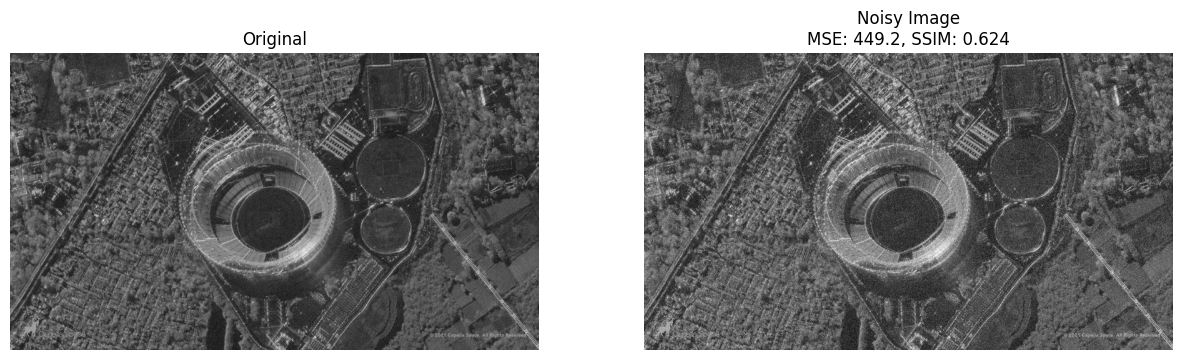

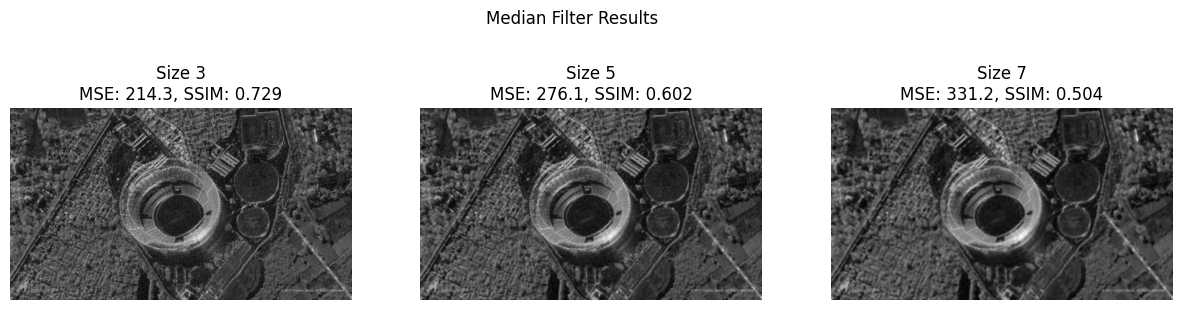

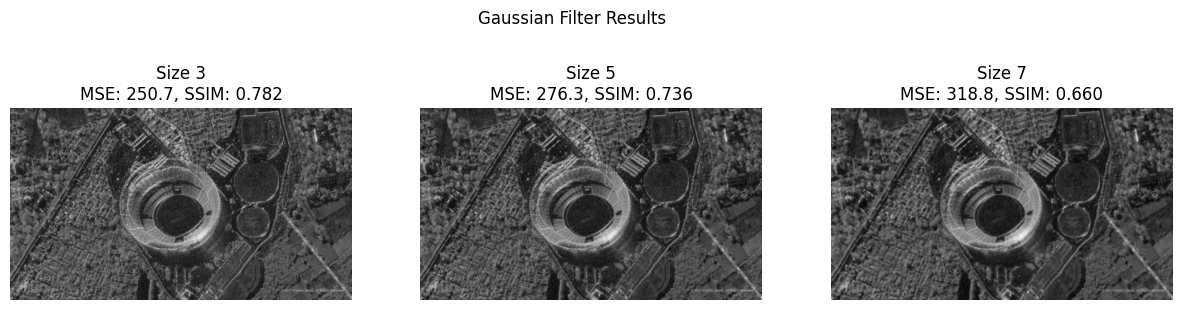

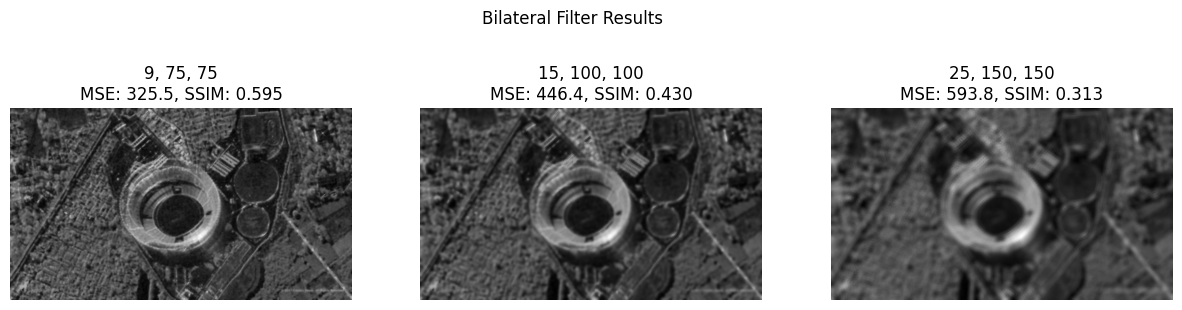

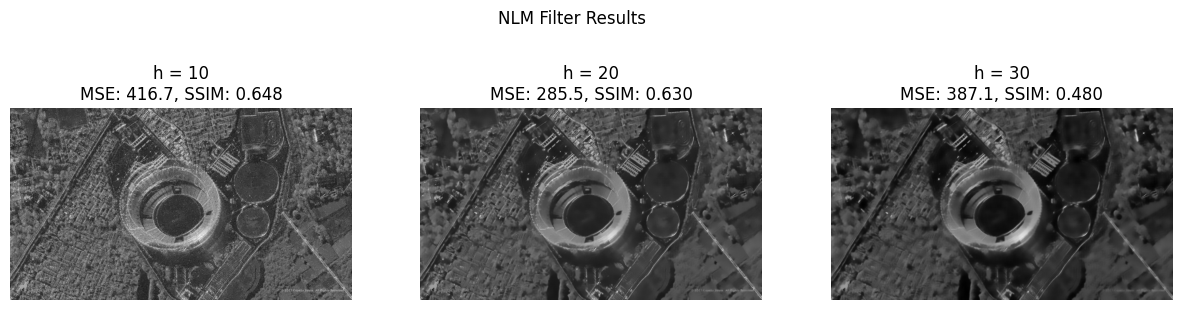

Лучший результат по среднеквадратичной ошибке: Median Size 3
MSE: 214.31


Лучший результат по структурному сходству: Gaussian Size 3
SSIM: 0.7820


In [9]:
title = 'Original'
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title(f'{title}')
plt.axis('off')

mean, stddev = 0, 30
cv2.randn(noise_gauss, mean, stddev)
image_noise_gauss = cv2.add(image_gray, noise_gauss)

noisy_mse = mean_squared_error(image_gray, image_noise_gauss)
noisy_ssim = structural_similarity(image_gray, image_noise_gauss)

title = 'Noisy Image'
plt.subplot(1, 2, 2)
plt.imshow(image_noise_gauss, cmap='gray')
plt.title(f'{title}\nMSE: {noisy_mse:.1f}, SSIM: {noisy_ssim:.3f}')
plt.axis('off')
plt.show()

filters = {
    'Median': [3, 5, 7],
    'Gaussian': [3, 5, 7],
    'Bilateral': [(9,75,75), (15,100,100), (25,150,150)],
    'NLM': [10, 20, 30]
}

best_filter_mse = None
best_filter_ssim = None
best_mse = float('inf')
best_ssim = 0
best_params_mse = ""
best_params_ssim = ""

for filter_name, params in filters.items():
    plt.figure(figsize=(15, 4))
    plt.suptitle(f'{filter_name} Filter Results')
    
    for i, param in enumerate(params):
        if filter_name == 'Median':
            filtered = cv2.medianBlur(image_noise_gauss, param)
            title = f'Size {param}'
        elif filter_name == 'Gaussian':
            filtered = cv2.GaussianBlur(image_noise_gauss, (param, param), 0)
            title = f'Size {param}'
        elif filter_name == 'Bilateral':
            filtered = cv2.bilateralFilter(image_noise_gauss, param[0], param[1], param[2])
            title = f'{param[0]}, {param[1]}, {param[2]}'
        else:
            filtered = cv2.fastNlMeansDenoising(image_noise_gauss, h=param)
            title = f'h = {param}'
        
        mse = mean_squared_error(image_gray, filtered)
        ssim = structural_similarity(image_gray, filtered)
        
        plt.subplot(1, 3, i+1)
        plt.imshow(filtered, cmap='gray')
        plt.title(f'{title}\nMSE: {mse:.1f}, SSIM: {ssim:.3f}')
        plt.axis('off')
        
        if mse < best_mse:
            best_mse = mse
            best_filter_mse = filter_name
            best_params_mse = title

        if ssim > best_ssim:
            best_ssim = ssim
            best_filter_ssim = filter_name
            best_params_ssim = title
    
    plt.show()

print(f"Лучший результат по среднеквадратичной ошибке: {best_filter_mse} {best_params_mse}")
print(f"MSE: {best_mse:.2f}")

print("\n")

print(f"Лучший результат по структурному сходству: {best_filter_ssim} {best_params_ssim}")
print(f"SSIM: {best_ssim:.4f}")